### 5.범주형 데이터 다루기 [20201115]

순서가 없는 범주 => 명목형 범주<br>
순서가 있는 범주 => 순서형 범주

#### 5.1 순서가 없는 범주형 특성 인코딩하기

In [1]:
# 원핫인코딩 = LabelBinarizer
import numpy as np
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

In [2]:
feature = np.array([["Texas"],["California"],["Texas"],["Delaware"],["Texas"]])

In [3]:
#원핫인코더를 만든다
one_hot = LabelBinarizer()

In [4]:
#특성을 원핫인코딩하기
one_hot.fit_transform(feature)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [7]:
#classes_ 속성 확인
one_hot.classes_

array(['California', 'Delaware', 'Texas'], dtype='<U10')

In [8]:
#원핫인코딩에서 원래대로 되돌리기
one_hot.inverse_transform(one_hot.transform(feature))

array(['Texas', 'California', 'Texas', 'Delaware', 'Texas'], dtype='<U10')

In [9]:
#판다스를 이용해서도 가능
import pandas as pd
pd.get_dummies(feature[:,0])

,California,Delaware,Texas
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [10]:
#sklearn의 장점은 다중 클래스도 다룰 수 있다는 점이다.
multiclass_feature = [("Texas","Florida"),("California","Alabama"),
                      ("Delware","Florida"),("Texas","Alabama")]

In [11]:
one_hot_multiclass = MultiLabelBinarizer()

In [12]:
one_hot_multiclass.fit_transform(multiclass_feature)

array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])

In [13]:
one_hot_multiclass.classes_

array(['Alabama', 'California', 'Delware', 'Florida', 'Texas'],
      dtype=object)

원핫 인코딩을 한 후에는 선형 의존성을 피하기 위해 결과 행렬에서 원핫이코딩된 특성 중 하나를 삭제하는게 좋다

특성 배열을 원핫인코딩 할 때는 OneHotEncoder 클래스를 사용하는 것이 좋다

In [27]:
from sklearn.preprocessing import OneHotEncoder

feature = np.array([["Texas",1],["California",1],["Texas",3],
                    ["Delware",1],["Texas",1]])

In [28]:
#기본적으로 희소 행렬을 반환한다. sparse=False를 하면 밀집 행렬을 얻을 수 있다.
one_hot_encoder = OneHotEncoder(sparse=False)

In [29]:
one_hot_encoder.fit_transform(feature)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.]])

In [30]:
#클래스 확인
one_hot_encoder.categories_

[array(['California', 'Delware', 'Texas'], dtype='<U10'),
 array(['1', '3'], dtype='<U10')]

In [26]:
one_hot_encoder = OneHotEncoder(sparse=True)
one_hot_encoder.fit_transform(feature)

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

OneHotEncoder은 입력 특성 배열을 모두 범주형으로 인식함 특성 열에만 적용시 ColumnTransformer쓰기

#### 5.2 순서가 있는 범주형 특성 인코딩하기

In [36]:
# replace 메서드를 사용해서 문자를 수치값으로 만들기
dataframe = pd.DataFrame({"Score":["Low","Low","Medium","Medium","High"]})

In [39]:
#매핑 딕셔너리 만들기
mapping = {"Low":1, "Medium":2, "High":3}

In [40]:
dataframe["Score"].replace(mapping)

0    1
1    1
2    2
3    2
4    3
Name: Score, dtype: int64

리커트 척도(매우그렇다, 그렇다. 보통이다, 그렇지않다, 전혀그렇지않다)는 태생적으로 어떤 순서가 포함된 경우이다.

In [44]:
dataframe = pd.DataFrame({"Score":["Low","Low","Medium","Medium","High","Barely More Than Medium"]})

In [45]:
scale_mapper = {"Low":1, "Medium":2, "Barely More Than Medium":2.1,"High":3}

In [46]:
dataframe["Score"].replace(scale_mapper)

0    1.0
1    1.0
2    2.0
3    2.0
4    3.0
5    2.1
Name: Score, dtype: float64

In [47]:
#범주형 데이터를 정수로 인고딩하는 OrdinalEncoder 추가, 클래스 범주를 순서대로 변환
from sklearn.preprocessing import OrdinalEncoder

In [49]:
feature = np.array([["Low",10],["High",50],["Medium",3]])

In [50]:
ordinalencoder = OrdinalEncoder()

In [51]:
ordinalencoder.fit_transform(feature)

array([[1., 0.],
       [0., 2.],
       [2., 1.]])

In [53]:
ordinalencoder.categories_

[array(['High', 'Low', 'Medium'], dtype='<U6'),
 array(['10', '3', '50'], dtype='<U6')]

#### 5.3 특성 딕셔너리 인코딩하기

In [64]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"Red":2, "Blue":4},{"Red":4, "Blue":3},
            {"Red":1, "Yellow":2},{"Red":2, "Yellow":2}]

In [65]:
dictvectorizer =DictVectorizer(sparse=False)

In [66]:
features = dictvectorizer.fit_transform(data_dict)

In [67]:
features

array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])

In [70]:
#dictvectorizer =DictVectorizer(sparse=True)
#features = dictvectorizer.fit_transform(data_dict)
#features

In [68]:
#생성된 특성의 이름을 얻음
features_names = dictvectorizer.get_feature_names()
features_names

['Blue', 'Red', 'Yellow']

In [69]:
pd.DataFrame(features,columns=features_names)

,Blue,Red,Yellow
0,4.0,2.0,0.0
1,3.0,4.0,0.0
2,0.0,1.0,2.0
3,0.0,2.0,2.0


In [71]:
one = {"Red":2, "Blue":4}
two = {"Red":4, "Blue":3}
three = {"Red":1, "Yellow":2}
four = {"Red":2, "Yellow":2}

In [72]:
word_counts = [one,two,three,four]

In [73]:
dictvectorizer.fit_transform(word_counts)

array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])

#### 5.4 누락된 클래스 값 대체하기

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
X = np.array([[0,2.10,1.45],[1,1.18,1.33],[0,1.22,1.27],[1,-0.21,-1.19]])

In [78]:
#범주형 특성에 누락된 값이 있는 특성 행렬을 만든다
X_with_nan = np.array([[np.nan,0.87,1.31],[np.nan,-0.67,-0.22]])

In [80]:
#KNN 학습기 훈련
clf = KNeighborsClassifier(3, weights="distance")
trained_model = clf.fit(X[:,1:],X[:,0])

In [83]:
#누락된 값의 클래스 예측
imputed_values = trained_model.predict(X_with_nan[:,1:])

In [84]:
#예측한 클래스와 원본 특성을 열로 합침
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))

In [85]:
#두 특성 행렬을 연결
np.vstack((X_with_imputed,X))

array([[ 0.  ,  0.87,  1.31],
       [ 1.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

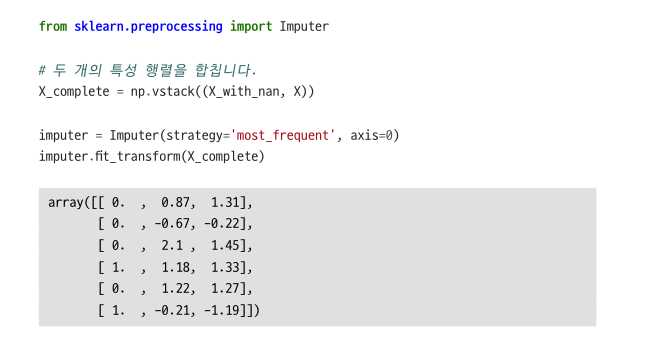

In [119]:
from sklearn.preprocessing import Imputer

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

#### 5.5 불균형한 클래스 다루기

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [93]:
iris = load_iris()

In [95]:
#특성 벡터를 만든다
features = iris.data

In [96]:
#타깃 벡터를 만든다
target = iris.target

In [97]:
#처음 40개 샘플 삭제
features = features[40:,:]
target = target[40:]

In [98]:
#클래스 0을 음성클래스로 하는 이진 타깃 벡터를 만든다.
target = np.where((target == 0),0,1)

In [99]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [100]:
#가중치 설정
weights ={0:.9,1:.1}

In [101]:
RandomForestClassifier(class_weight=weights)

RandomForestClassifier(class_weight={0: 0.9, 1: 0.1})

In [103]:
RandomForestClassifier(class_weight="balanced")

RandomForestClassifier(class_weight='balanced')

다수 클래스의 샘플을 줄이거나(다운샘플링), 소수 클래스의 샘플을 늘림(업샘플링)

In [105]:
#각 클래스의 샘플 인덱스를 추출
i_class0 = np.where(target == 0)[0]
i_class1 = np.where(target == 1)[0]

In [106]:
n_class0 = len(i_class0)
n_class1 = len(i_class1)

In [107]:
n_class0

10

In [108]:
n_class1

100

In [113]:
#클래스 0의 샘플만큼 클래스 1에서 중복을 허용하지 않고 랜덤하게 샘플을 뽑는다.
i_class1_downsampled = np.random.choice(i_class1, size = n_class0, replace=False)

In [114]:
#클래스 0의 타깃 벡터와 다운샘플링된 클래서 1의 타깃 벡터를 합친다.
np.hstack((target[i_class0], target[i_class_downsampled]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [115]:
#클래스 0의 특성 행렬과 다운샘플링된 클래스 1의 특성 행렬을 합친다.
np.vstack((features[i_class0,:], features[i_class1_downsampled,:]))[0:5]

array([[5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4]])

업샘플링 ~~~

In [116]:
##클래스 1의 샘플만큼 클래스 0에서 중복을 허용하여 랜덤하게 샘플을 뽑는다.
i_class0_upsampled = np.random.choice(i_class0, size = n_class1, replace=True)

In [117]:
#클래스 0의 업샘플링된 타깃 벡터와 클래서 1의 타깃 벡터를 합친다.
np.concatenate((target[i_class0_upsampled], target[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [118]:
#클래스 0의 업샘플링된 특성 행렬과 클래스 1의 특성 행렬을 합친다.
np.vstack((features[i_class0_upsampled,:], features[i_class1,:]))[0:5]

array([[4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 3.3, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2]])